# Step 1. Import necessary libraries and read dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ttest_1samp, ttest_ind,wilcoxon,mannwhitneyu
from statsmodels.stats.power import ttest_power

In [2]:
#Using pandas to read csv file
data = pd.read_csv('../input/insurance.csv')

**2. Read the data as a Dataframe**

In [3]:
mydata = pd.DataFrame(data)
mydata

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
mydata.head() 
#displays the top 5 rows of the dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Step 2. Perform Basic EDA

**3.a). Shape of data**

In [5]:
mydata.shape

(1338, 7)

Gives shape of the data, 1338 rows and 7 columns

**3.b). Datatype of each attribute**

In [6]:
mydata.info() 
#can also use mydata.dtypes to find datatype of each attribute

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**3.c). Checking presence of missing values**

In [7]:
mydata.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No Null values present

**3.d). 5 point summary of all numerical attributes**

In [8]:
#5 point summary will give Xmin, 25th percentile, Median, 75th percentile,Xmax values
mydata.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
#Additional information of all attributes
mydata.describe(include = 'all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


**3.e). Distribution of 'bmi', age and charges columns**

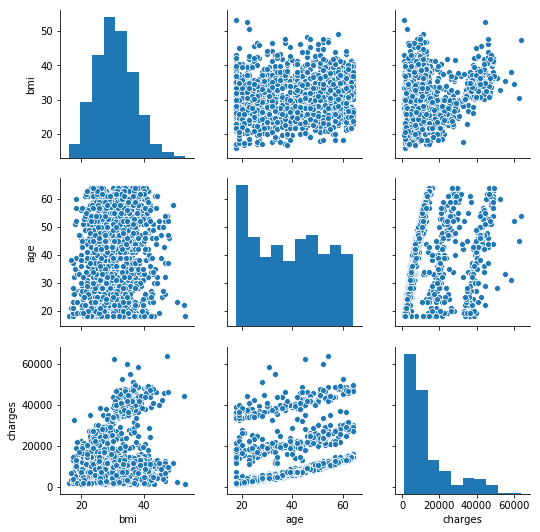

In [10]:
#Since these columns are continuous variables hence using pairplot
#Pairplot plots frequency distribution (histogram) & scatter plots
sns.pairplot(mydata[['bmi','age','charges']])

Plotting individual distribution charts for BMI, Age, Charges columns

1). Plot the Distribution of 'bmi' column, it follows Normal distribution

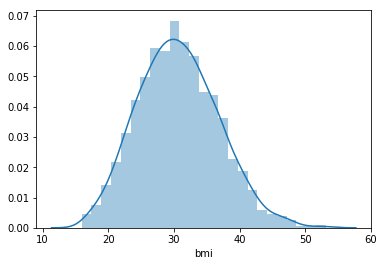

In [11]:
sns.distplot(data['bmi'])

2). Plot Distribution of 'age' column

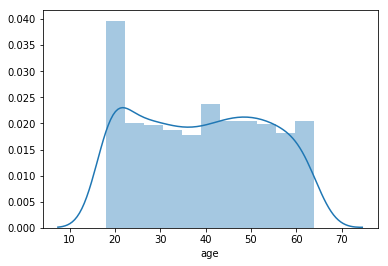

In [12]:
sns.distplot(data['age'])

3). Plot the Distribution of 'charges' column, which is right skewed 

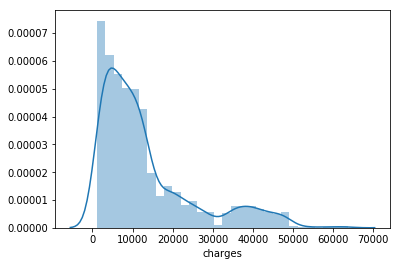

In [13]:
sns.distplot(data['charges'])

4). Plot distribution of 'children' using countplot

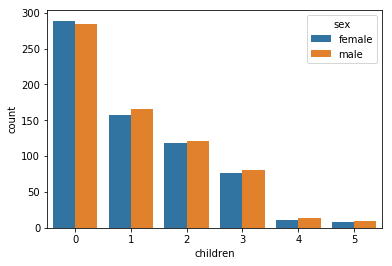

In [14]:
sns.countplot(data['children'], hue = data['sex'])

There's significant count of population who don't have children

**3.f). Measure of skewness of Bmi, age & charges columns**

In [15]:
#Skewness is a measure of attribute's symmetry.
mydata.skew(axis = None)

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

when,
* skewness = 0 : normally distributed
* skewness > 0 : right skewed
* skewness < 0 : left skewed

**3.g). Check presence of outliers in Bmi, age, charges**

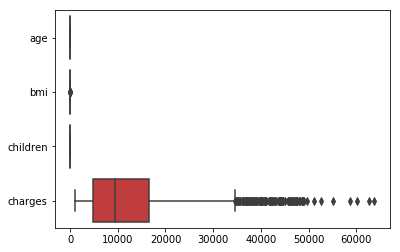

In [16]:
#Outliers are exceptions which are undesirable. Boxplots depict outliers as *
sns.boxplot(data = mydata, orient = 'h')

1). Displaying outliers in bmi data

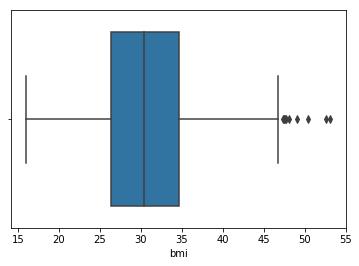

In [17]:
sns.boxplot(mydata['bmi'])

2). Displaying outliers in age data

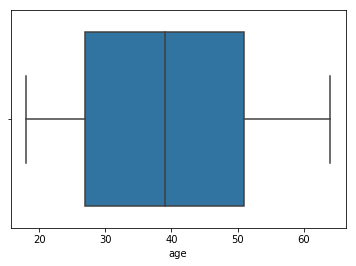

In [18]:
sns.boxplot(mydata['age'])

3). Displaying outliers in charges data

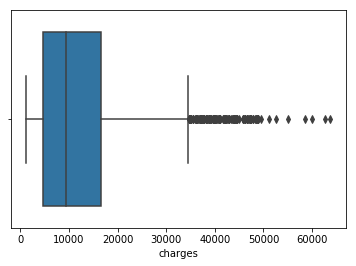

In [19]:
sns.boxplot(mydata['charges'])

There are outliers in bmi & charges columns. While there are no outliers in age column.

**3.h). Distribution of Categorical columns include children**

There are 4 categorical columns Age, Sex, Children, Region, Smoker

To show distribution of Categorical columns, Violinplot can be used to depict scatter of the data

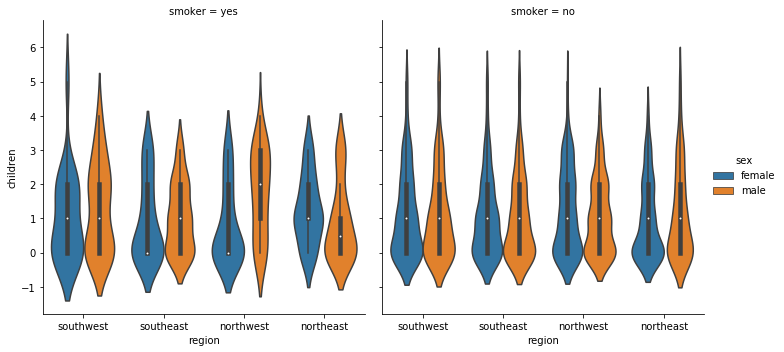

In [20]:
sns.catplot(x = 'region', y = 'children', data = mydata, hue = 'sex', kind = 'violin', col = 'smoker')

**3.i). Pairplot that includes all of the columns of the data**

Pairplot is useful to show distribution between various columns

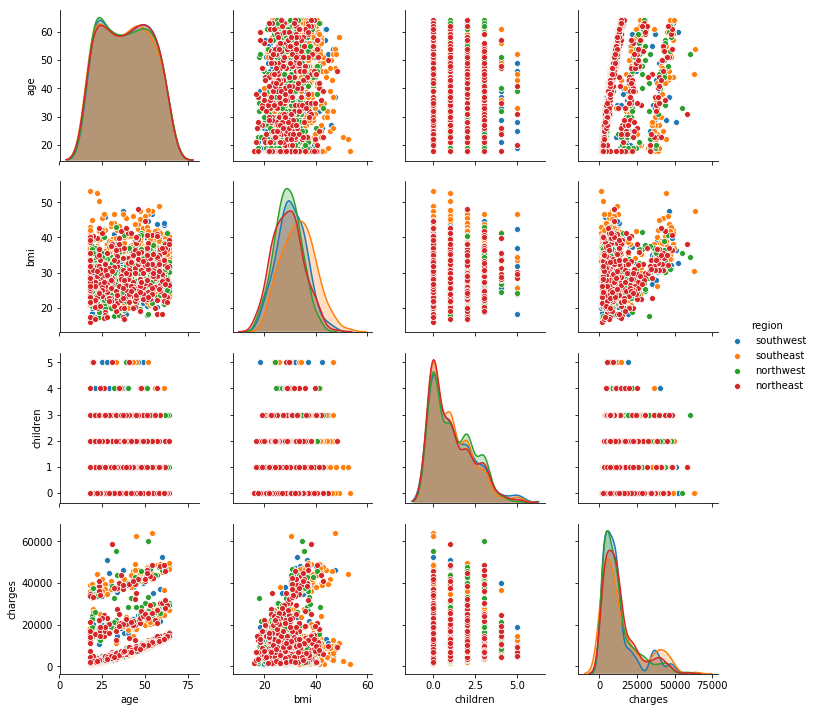

In [21]:
sns.pairplot(data = mydata, hue = 'region')

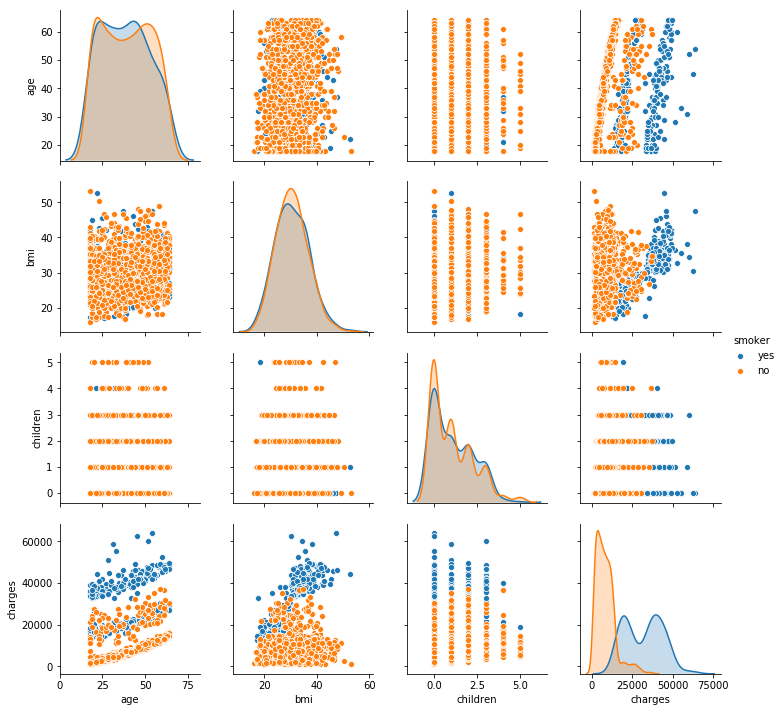

In [22]:
sns.pairplot(data = mydata, hue = 'smoker')

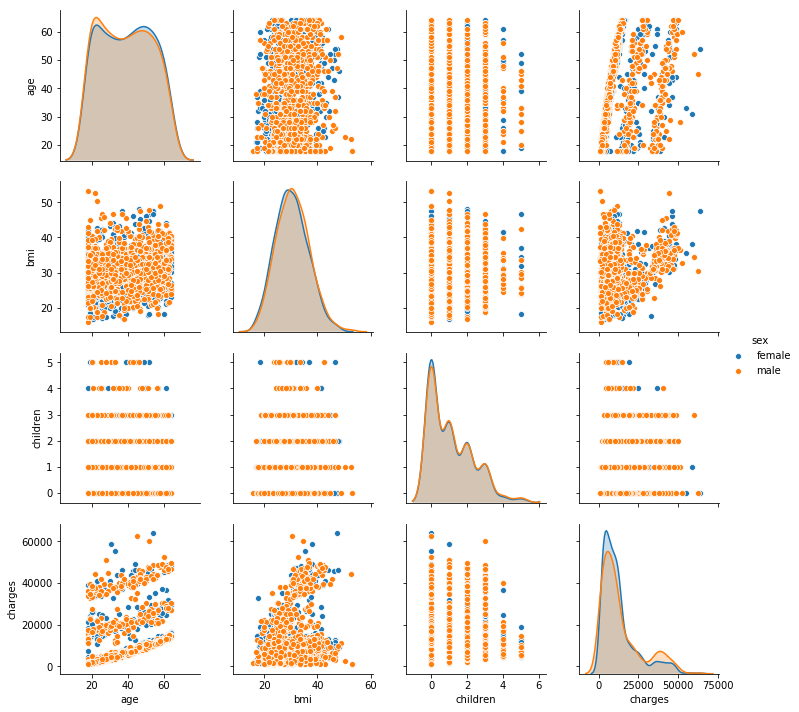

In [23]:
sns.pairplot(data = mydata, hue = 'sex')

# Step 3. Perform Statistical Analysis

**4.a).Do charges of people who smoke differ significantly from the people who don't?**

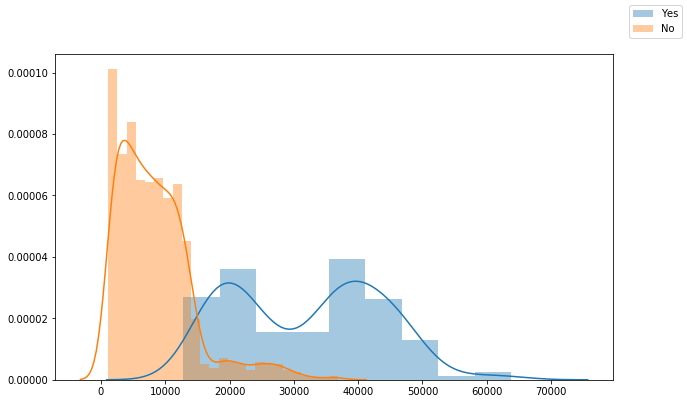

In [24]:
#Null hypothosis: H0 = Smoking does not affect Insurance Charges
#Alternate hypothesis: Ha = Smoking does affect Insurance Charges

Yes = np.array(mydata[mydata['smoker'] == 'yes']['charges'])
No = np. array(mydata[mydata['smoker'] == 'no']['charges'])
fig = plt.figure(figsize = (10,6))
sns.distplot(Yes)
sns.distplot(No)
fig.legend(labels = ["Yes","No"])

As per the above distribution, smoking does affect Insurance charges. Let's verify this using statistical analysis 

In [25]:
#Using 2 sided T test for independent samples

t_statistic, p_value = stats.ttest_ind(Yes,No)
t_statistic, p_value

(46.664921172723716, 8.271435842177219e-283)

t_statistic is 46.66 standard deviations away from the expected value while p_value helps to determine significance of the results. Here p_value is negligible

In [26]:
if p_value < 0.05:
    print("Reject Null hypothesis")
else:
    print("Fail to reject Null hypothesis")

Reject Null hypothesis


**Answer: Charges of people who smoke differs significantly from the people who don't smoke**

Using Mannwhitneyu Test to further test this statistically

In [27]:
#Using mannwhitneyu test
u_statistic, p_value = mannwhitneyu(Yes, No)
u_statistic, p_value
#u_statistic, p_value leads us to reject Null hypothesis

(7403.0, 2.6351167222517853e-130)

Mannwhitneyu test gives a large u_statistic and a very insignificant p value, hence we reject Null Hypothesis   

In [28]:
#Calculate Power of test - This is the probability of rejecting the Null hypothesis
#To show how statistically significant is the mannwhitneyu test
(np.mean(Yes) - np.mean(No))/ np.sqrt(((len(Yes) - 1)*np.var(Yes) + (len(No) - 1)*np.var(No))/ len(Yes) + len(No)-2)

1.43329425252805

In [29]:
print(ttest_power(1.4333, nobs = (len(Yes) + len(No)), alpha = 0.05, alternative = 'two-sided'))

1.0


This clearly states the Power of test is 1.0 which means Null hypothesis will be rejected 10 out of 10 times

**4.b).Does bmi of males differ significantly from that of females?**

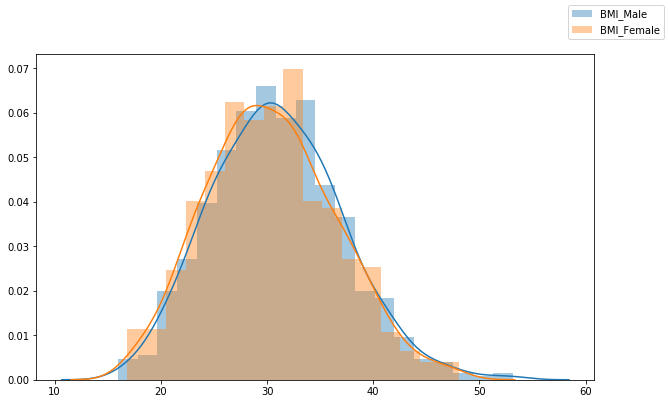

In [30]:
#Null Hypothesis: H0 = Bmi of Males do not differ significantly from that of Females
#Alternate Hypothesis: Ha = Bmi of Males differs significantly from that of Females
#2 sided T test for independent samples
bmi_male = np.array(mydata[mydata['sex'] == 'male']['bmi'])
bmi_female = np.array(mydata[mydata['sex'] == 'female']['bmi'])

fig = plt.figure(figsize = (10,6))
sns.distplot(bmi_male)
sns.distplot(bmi_female)
fig.legend(labels = ["BMI_Male","BMI_Female"])

As per the above distribution, we can say distribution between BMI of Male and Female does not differ significantly. Let's verify this using statistical analysis 

In [31]:
#Using 2 sided T test for independent samples
t_statistic,p_value = stats.ttest_ind(bmi_male,bmi_female)
t_statistic,p_value

(1.696752635752224, 0.08997637178984932)

t_statistic is 1.69 standard deviations away from the expected value while p_value helps to determine significance of the results.

In [32]:
if p_value < 0.05:
    print("Reject Null hypothesis")
else:
    print("Fail to Reject Null hypothesis")

Fail to Reject Null hypothesis


**Answer: BMI of Males does not differ significantly with that of BMI of Females**

In [33]:
#Using mannwhitneyu test
u_statistic, p_value = mannwhitneyu(bmi_male, bmi_female)
u_statistic, p_value
#u_statistic, p_value leads us to Fail to reject Null hypothesis

(212180.0, 0.05070064020142721)

Mannwhitneyu test gives a large u_statistic while p_value is 0.05, hence we Fail to reject Null hypothesis

In [34]:
#Calculate Power of test - This is the probability of rejecting the Null hypothesis
#To show how statistically significant is the mannwhitneyu test
(np.mean(bmi_male) - np.mean(bmi_female))/ np.sqrt(((len(bmi_male) - 1)*np.var(bmi_male) + (len(bmi_female) - 1)*np.var(bmi_female))/ len(bmi_male) + len(bmi_female)-2)

0.02087874005137261

In [35]:
print(ttest_power(0.020, nobs = (len(bmi_male) + len(bmi_female)), alpha = 0.05, alternative = 'two-sided'))

0.11311348326631365


This clearly states the Power of test is 0.1 which means Null hypothesis will be rejected 1 out of 10 times as in Null hypothesis will be accepted 9 out of 10 times

**4.c). Is the proportion of smokers significantly different in different genders?**

In [36]:
#As Smokers and Gender are categorical variables hence we use Proportions test
#Null hypothesis: H0 = Proportion of smokers do not differ significantly in different genders
#Alternate hypothesis: Ha = Proportion of smokers differs significantly in different genders

pd.crosstab(mydata['sex'], mydata['smoker'], margins = True)

smoker,no,yes,All
sex,,,
female,547,115,662
male,517,159,676
All,1064,274,1338


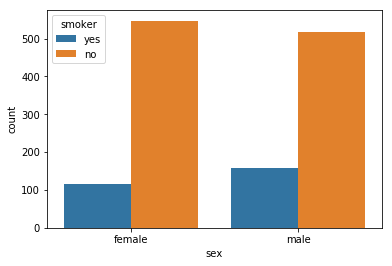

In [37]:
sns.countplot(mydata['sex'], hue = mydata['smoker'])

As per above graph, proportion of smokers seem to be significantly different in different genders. Let's study this further using statistical analysis.

In [38]:
#Ex11 = Expected value of Smoker = No & Sex = Female
#Ex12 = Expected value of Smoker = No & Sex = Male
#Ex21 = Expected value of Smoker = Yes & Sex = Female
#Ex22 = Expected value of Smoker = Yes & Sex = Male
Ex11 = (1064 * 662) / 1338
Ex12 = (1064 * 676) / 1338
Ex21 = (274 * 662) / 1338
Ex22 = (274 * 676) / 1338

In [39]:
from statsmodels.stats.proportion import proportions_ztest

z_stats, p_val = proportions_ztest([115,159], [662,676])
z_stats, p_val

(-2.7867402154855503, 0.005324114164320532)

As per z_statistics, the proportion differs 2.78 standard deviations below the expected value

In [40]:
if p_val < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Fail to Reject Null Hypothesis')

Reject Null Hypothesis


**Answer: Proportion of smokers differs significantly with Gender**

As Smoker & Gender are categorical variables hence we use Chi-Square test to further test the relationship between them

In [41]:
#Using Chi square test sum(Obs - Exp)^2/ Exp
observed_values = scipy.array([547,517,115,159])
n = observed_values.sum()
expected_values = scipy.array([Ex11,Ex12,Ex21,Ex22])
chi_square_stat, p_value = stats.chisquare(observed_values, f_exp=expected_values)
chi_square_stat, p_value

(7.765921028604452, 0.05110542480532434)

In [42]:
#Degree of freedom for chi square test = (row - 1)(col -1)
dof = (2-1)*(2-1)
dof

1

In [43]:
#Using Chi-square distribution table, we should check if chisquare stat of 7.765 exceeds 
#critical value of chisquare distribution. Critical value of alpha is 0.05 for 95% confidence 
#which is 3.84. As 7.765 > 3.84, we can reject Null Hypothesis

if chi_square_stat > 3.84:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


**Answer: Proportion of smokers differs significantly with Gender**

**4.d). Is the distribution of bmi across women with no children, one child and two children, the same ?**

In [44]:
#Null Hypothesis: H0 = Distribution of BMI for women with 0,1,2 children is same
#Alternate Hypothesis: Ha = Distribution of BMI for women with 0,1,2 children is not same

bmidata = mydata[(mydata['children'] <= 2) & (mydata['sex'] == 'female')][['sex','bmi', 'children']]
bmidata.head()

,sex,bmi,children
0,female,27.90,0
5,female,25.74,0
6,female,33.44,1
9,female,25.84,0
11,female,26.29,0


In [45]:
#Grouping into 3 groups, 0,1,2 children
zero_ch = np.array(bmidata[bmidata['children'] == 0]['bmi'])
one_ch = np.array(bmidata[bmidata['children'] == 1]['bmi'])
two_ch = np.array(bmidata[bmidata['children'] == 2]['bmi'])

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


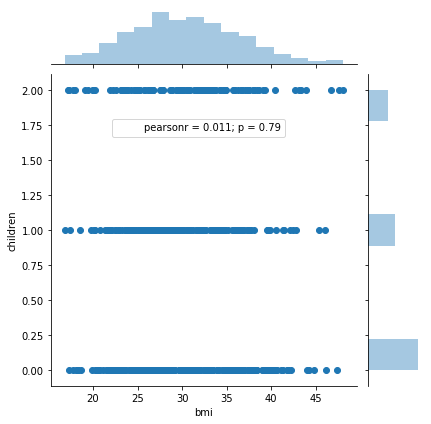

In [46]:
#Relationship between Bmi and children for women
bmigraph = sns.jointplot(bmidata['bmi'],bmidata['children'])
bmigraph = bmigraph.annotate(stats.pearsonr, fontsize=10, loc=(0.2, 0.8))

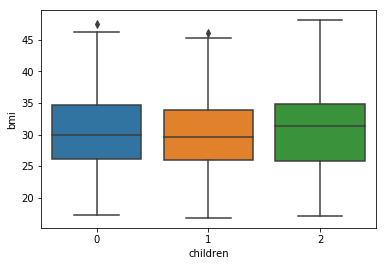

In [47]:
sns.boxplot(x = 'children', y = 'bmi', data = bmidata)

From both the above graph we can derive BMI distribution for women with 0,1,2 children are same.

Let's analyze this further using statistical analysis.

In [48]:
#Use One Way ANOVA for 3 sample groups 
#Null Hypothesis: H0: mean(zero_ch) = mean(one_ch) = mean(two_ch)
#Alternate Hypothesis: Ha: One of the means would differ

Here we have three groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means.

In [49]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod = ols('bmi ~ children', data = bmidata).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df         F   PR(>F)
children      2.512982    1.0  0.068411  0.79376
Residual  20717.738725  564.0       NaN      NaN


In [50]:
# Here p_value is 0.79376 > 0.05 hence we Fail to Reject Null Hypothesis therefore 

if 0.79 > 0.05:
    print("Fail to Reject Null Hypothesis")
else:
    print("Reject Null Hypothesis")

Fail to Reject Null Hypothesis


****Answer: Distribution of BMI for women with 0,1,2 children is same****